Se usó ChatGPT y GitHub copilot para el brainstorming y el autocompletado (también en las preguntas 1 y 2).
Se usará Dijkstra para "Generar las rutas óptimas encontradas desde la estación de carga hasta cada uno de los estantes " y
una función para encontrar el camino hamiltoniano para "mostrar la ruta total que incluye todas las entregas y el regreso a la estación."

In [19]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

# Función para cargar el archivo de texto y construir el grafo
def cargar_datos_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()

    num_nodos = int(lineas[0].strip())  
    posiciones = {}
    grafo = nx.Graph()

    # Leer las posiciones de la estación y los estantes
    for i in range(1, num_nodos + 1):
        nodo, coord = lineas[i].strip().split(":")
        x, y = map(int, coord.strip().strip("()").split(","))  
        posiciones[nodo.strip()] = (x, y)
        grafo.add_node(nodo.strip())

    # Leer las conexiones entre nodos
    for i in range(num_nodos + 1, len(lineas)):
        conexion = lineas[i].strip().split("<->")
        nodo1 = conexion[0].strip()
        nodo2, peso = conexion[1].strip().split()
        peso = int(peso.strip("()"))
        grafo.add_edge(nodo1, nodo2, weight=peso)

    return posiciones, grafo

# Algoritmo de Dijkstra para encontrar la ruta más corta
def dijkstra(grafo, inicio):
    distancias = {nodo: float('inf') for nodo in grafo.nodes}
    distancias[inicio] = 0
    prioridad = [(0, inicio)]
    padres = {inicio: None}
    
    while prioridad:
        dist_actual, nodo_actual = heapq.heappop(prioridad)

        if dist_actual > distancias[nodo_actual]:
            continue

        for vecino, datos in grafo[nodo_actual].items():
            peso = datos['weight']
            nueva_distancia = dist_actual + peso

            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                padres[vecino] = nodo_actual
                heapq.heappush(prioridad, (nueva_distancia, vecino))

    return distancias, padres

# Function to reconstruct the route and calculate its total weight
def reconstruir_ruta_y_peso(padres, destino, grafo):
    ruta = []
    peso_total = 0
    while destino is not None:
        ruta.append(destino)
        if padres[destino] is not None:
            peso_total += grafo[padres[destino]][destino]['weight']
        destino = padres[destino]
    return ruta[::-1], peso_total

# Function to get the optimal routes and their weights from a start node to all target nodes
def obtener_rutas(grafo, inicio, nodos_objetivo):
    rutas = {}  # To store individual routes
    pesos = {}  # To store the total weight of each route

    for nodo in nodos_objetivo:
        distancias, padres = dijkstra(grafo, inicio)
        ruta, peso_total = reconstruir_ruta_y_peso(padres, nodo, grafo)
        rutas[nodo] = ruta  # Save the route for later drawing
        pesos[nodo] = peso_total  # Save the total weight

    return rutas, pesos

# Function to draw the graph
def dibujar_grafo(grafo, posiciones, rutas=None, title="Grafo original"):
    plt.figure(figsize=(8, 8))
    nx.draw(grafo, pos=posiciones, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

    # Draw weights
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos=posiciones, edge_labels=edge_labels)

    if rutas:
        for ruta in rutas.values():
            edges = [(ruta[i], ruta[i+1]) for i in range(len(ruta)-1)]
            nx.draw_networkx_edges(grafo, pos=posiciones, edgelist=edges, edge_color='r', width=2)
    
    plt.title(title)
    plt.show()

El grafo es semieuleriano entonces utilizaremos el TSP para hallar  "la ruta total que incluye todas las entregas y el regreso a la estación."

In [31]:
from itertools import permutations
# Placeholder TSP function using a simple heuristic (nearest neighbor)
def encontrar_tsp(grafo, inicio, estantes):
    # Create a list of all nodes to visit
    nodos = [inicio] + estantes

    # Generate all possible permutations of the nodes (excluding the start node)
    rutas_posibles = permutations(estantes)

    mejor_ruta = None
    menor_peso = float('inf')

    # Evaluate each permutation
    for perm in rutas_posibles:
        ruta = [inicio] + list(perm) + [inicio]
        try:
            peso_total = sum(grafo[ruta[i]][ruta[i+1]]['weight'] for i in range(len(ruta)-1))
        except KeyError as e:
            continue
        
        if peso_total < menor_peso:
            menor_peso = peso_total
            mejor_ruta = ruta

    return mejor_ruta, menor_peso

Grafo original:


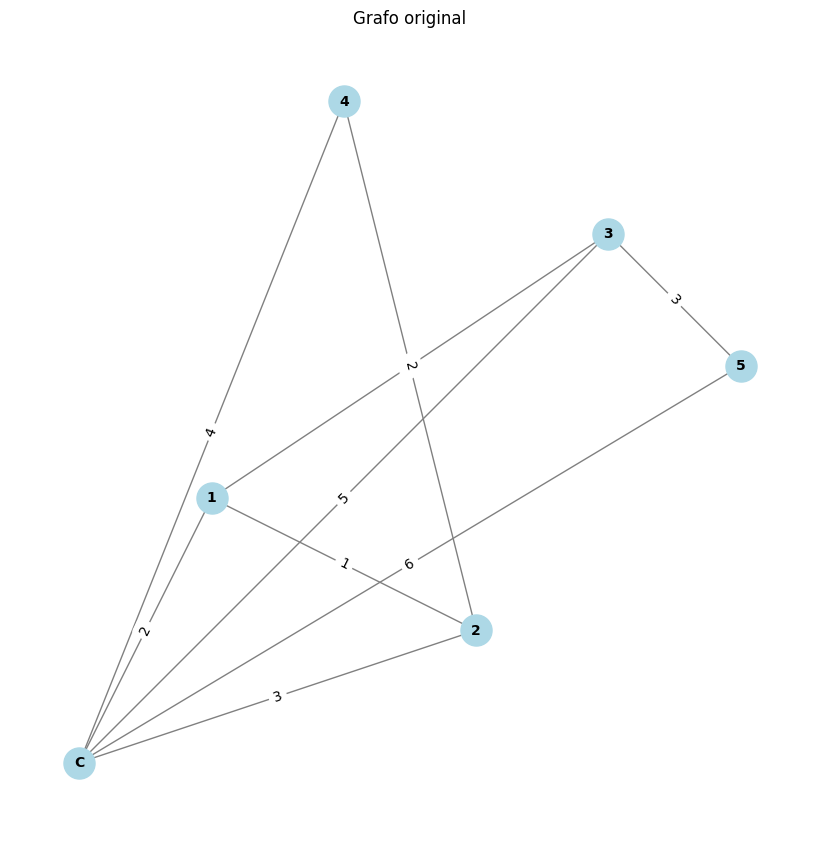

Grafo con la ruta de C a 1:


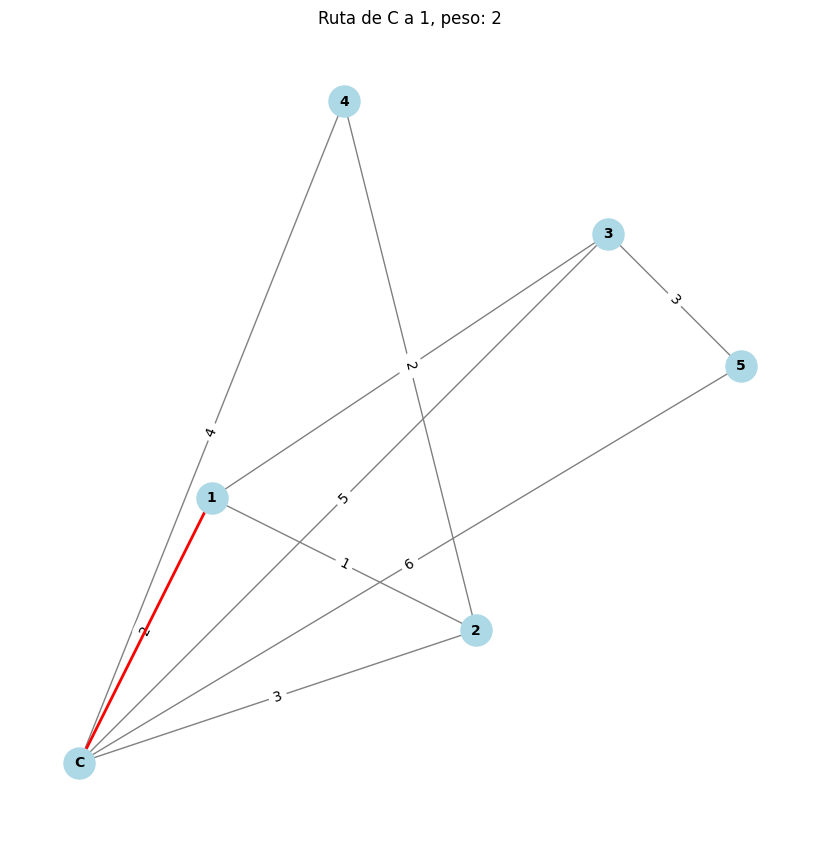

Grafo con la ruta de C a 2:


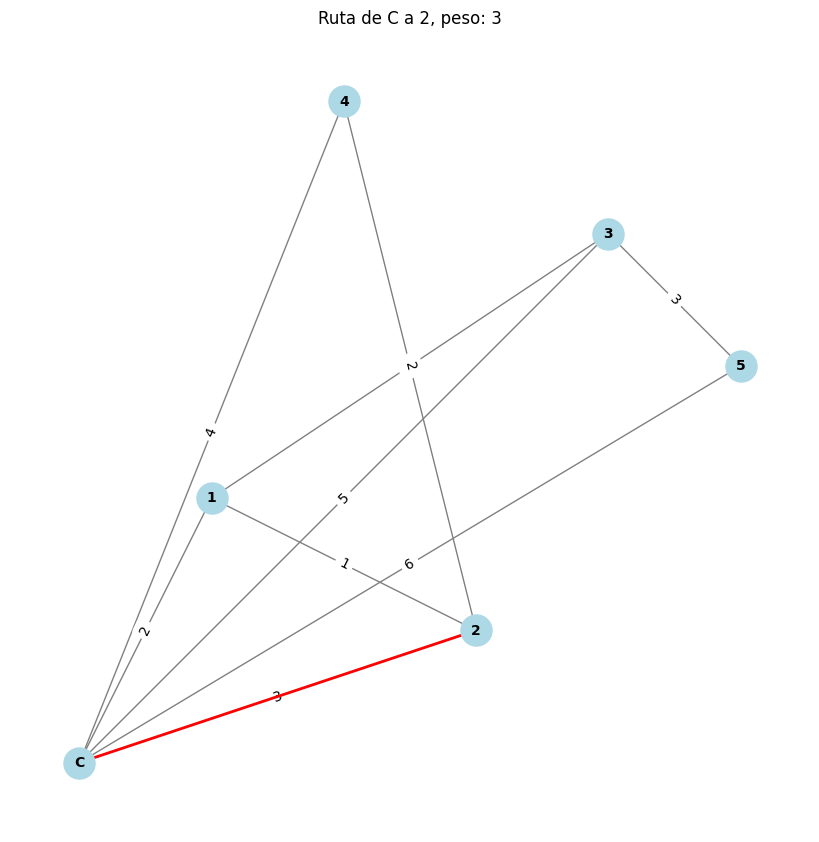

Grafo con la ruta de C a 3:


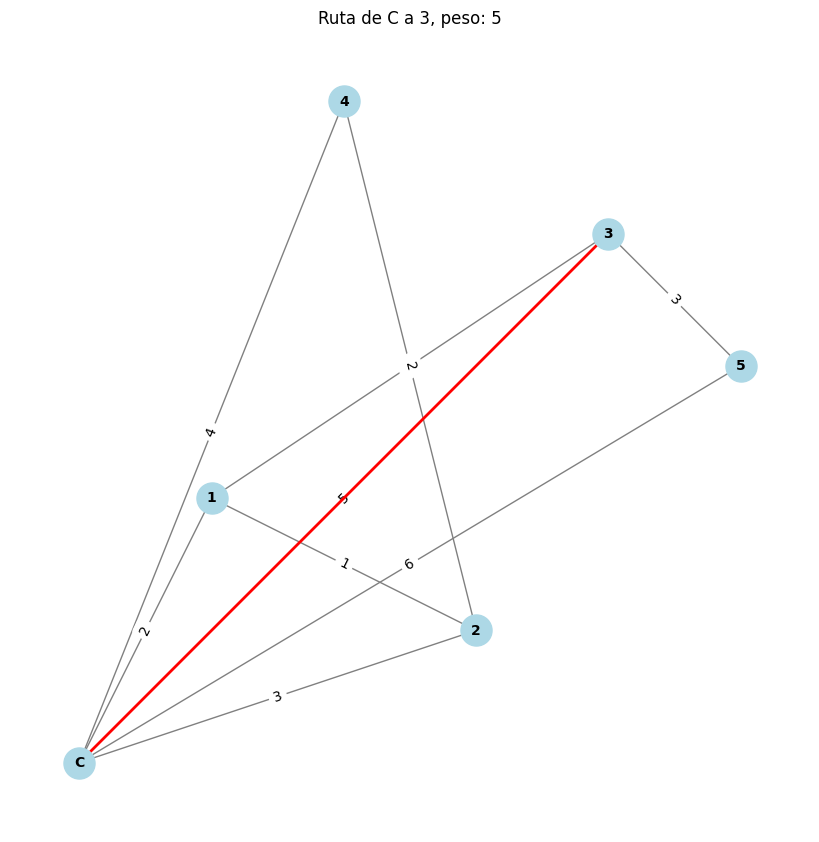

Grafo con la ruta de C a 4:


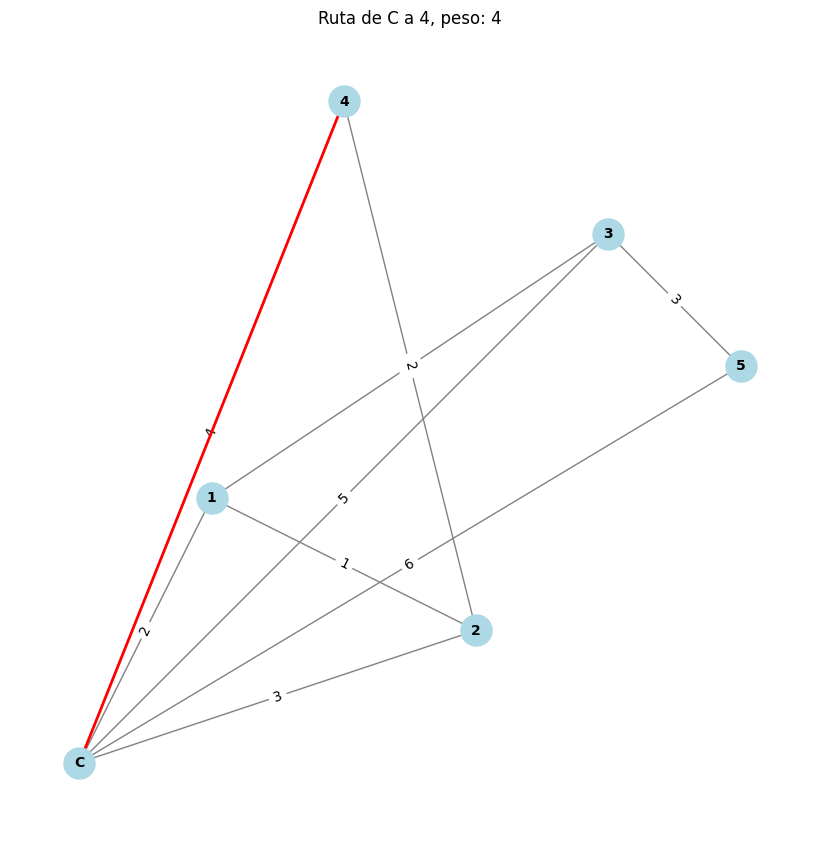

Grafo con la ruta de C a 5:


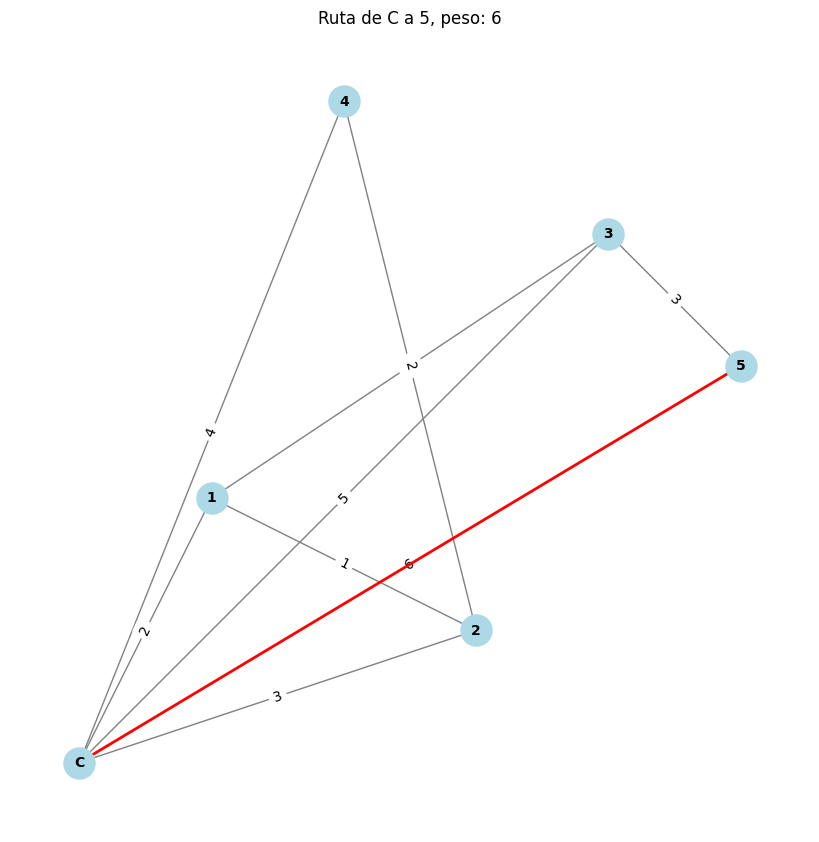

Ruta TSP: ['C', '4', '2', '1', '3', '5', 'C'], Peso total: 20


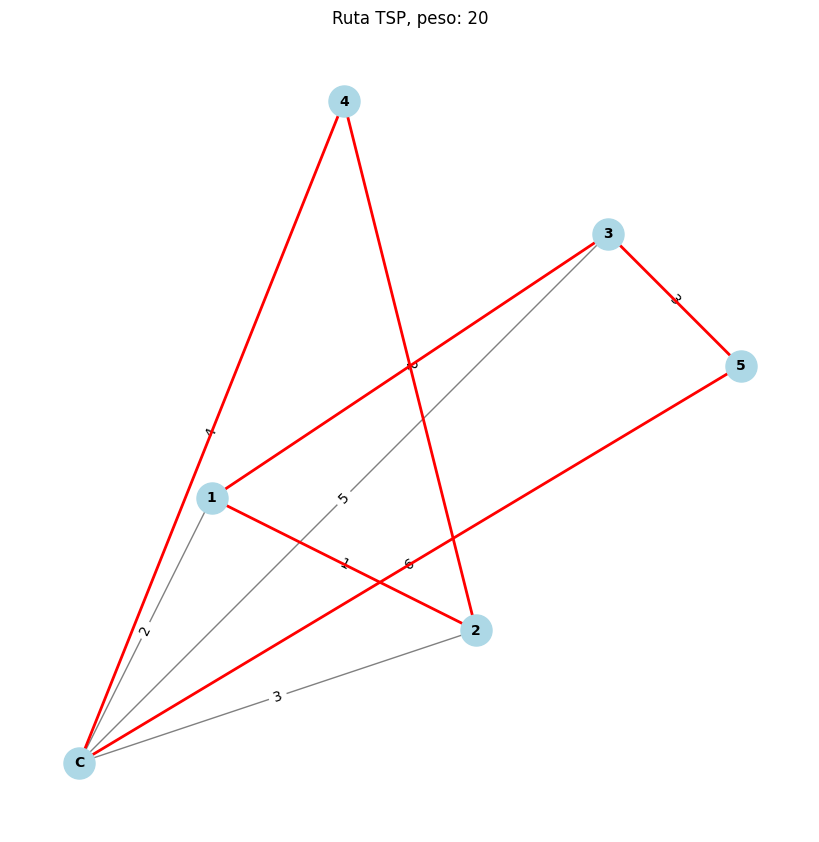

In [32]:
nombre_archivo = "almacen.txt"
posiciones, grafo = cargar_datos_archivo(nombre_archivo)

estantes = ["1", "2", "3", "4", "5"]
inicio = "C"

print("Grafo original:")
dibujar_grafo(grafo, posiciones)

rutas, pesos = obtener_rutas(grafo, inicio, estantes)

for nodo, ruta in rutas.items():
    peso_total = pesos[nodo]
    print(f"Grafo con la ruta de {inicio} a {nodo}:")
    dibujar_grafo(grafo, posiciones, rutas={nodo: ruta}, title=f"Ruta de {inicio} a {nodo}, peso: {peso_total}")

# Find and draw the TSP route
ruta_total, peso_total = encontrar_tsp(grafo, inicio, estantes)
if ruta_total is not None:
    print(f"Ruta TSP: {ruta_total}, Peso total: {peso_total}")
    dibujar_grafo(grafo, posiciones, rutas={'TSP': ruta_total}, title=f"Ruta TSP, peso: {peso_total}")
else:
    print("No se encontró una ruta TSP válida.")